# Pre-procesamiento de datos de EEG con MNE-Python (parte 2)
## Limpieza de datos 

En esta segunda parte se trabajará la limpieza de los datos a partir de la eliminación de los datos sucios.

## 0. Cargar paquetes

El paso cero es la carga de los paquetes. Es decir, la carga de las distintas funciones que vamos a estar utilizando en el script.

In [1]:
import os
import numpy as np
import mne
from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs

## 1. Carga de datos

Posteriormente, cargamos los datos en formato .fif que ya se encuentran **referenciados** y **filtrados**. 

In [14]:
subject_id = "SAAV0009"
task = "TOL"

raw = mne.io.read_raw_fif(("../data/" + task + "/preprocessing/" + subject_id + "_" + task +"_REF_FILT.fif"), preload=True)
print(raw.info)

Opening raw data file ../data/TOL/preprocessing/SAAV0009_TOL_REF_FILT.fif...
    Range : 0 ... 736255 =      0.000 ...   718.999 secs
Ready.
Reading 0 ... 736255  =      0.000 ...   718.999 secs...


C:\Users\Fede\AppData\Local\Temp\ipykernel_9616\1576707994.py:4: RuntimeWarning: This filename (../data/TOL/preprocessing/SAAV0009_TOL_REF_FILT.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(("../data/" + task + "/preprocessing/" + subject_id + "_" + task +"_REF_FILT.fif"), preload=True)


<Info | 12 non-empty values
 bads: 1 items (EXG8)
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 65 EEG, 2 misc, 3 EOG, 2 ECG, 1 Stimulus
 custom_ref_applied: True
 dig: 67 items (3 Cardinal, 64 EEG)
 file_id: 4 items (dict)
 highpass: 0.5 Hz
 lowpass: 40.0 Hz
 meas_date: 2023-11-13 11:51:57 UTC
 meas_id: 4 items (dict)
 nchan: 73
 projs: []
 sfreq: 1024.0 Hz
>


# 2. Limpieza de los datos

En este paso, vamos a inspeccionar los datos para eliminar los intervalos de tiempo que se vean mal.

## 2.1. Inspección previa

Antes de proceder, vamos a generar un gráfico de espectro de frecuencias para ver como está el espectro antes de la limpieza.

Effective window size : 2.000 (s)


c:\Users\Fede\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


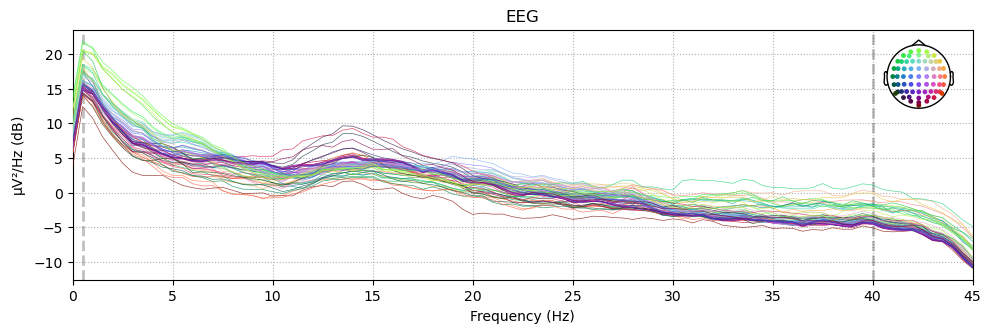

In [15]:
raw = raw.set_montage("biosemi64", on_missing="ignore")

raw.compute_psd(fmax=45).plot(picks="eeg")

## 2.2. Eliminando los intervalos malos

En este momento vamos a almacenar el gráfico con toda la señal dentro de un objeto llamado *fig*. A este objeto le vamos a aplicar la función `fake_keypress` para simular que apretamos la tecla a, que es lo que permite hacer anotaciones en gráficos. Una vez que estemos dentro del grafico buscaremos la opción de "add description" y le escribiremos "bad" para que MNE entienda que esos los debe eliminar.


In [16]:
fig = raw.plot()
fig.fake_keypress("a")  # Simulates user pressing 'a' on the keyboard.

Channels marked as bad:
['EXG8']


## 2.1. Inspección posterior

Volvemos a graficar el espectro pero con la diferencia de que vamos a agregarle el parámetro *reject_by_annotation = True* para pedirle que nos grafique el espectro sin las partes marcadas como malas.

Setting 6020 of 736256 (0.82%) samples to NaN, retaining 730236 (99.18%) samples.


Effective window size : 2.000 (s)


c:\Users\Fede\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


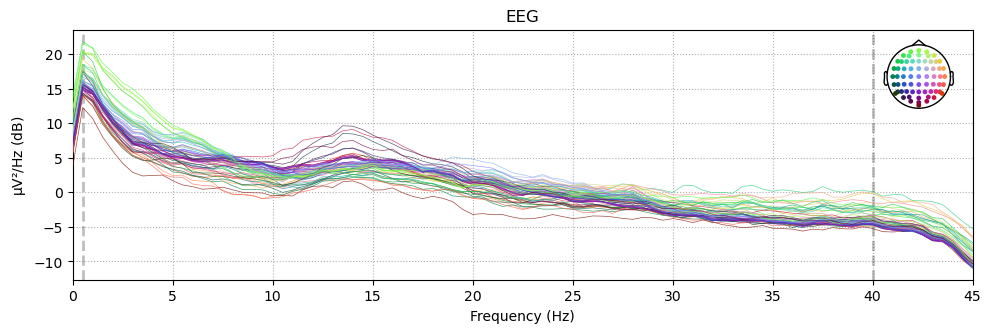

In [17]:
raw.compute_psd(fmax=45, reject_by_annotation=True).plot(picks="eeg")

# 4. Guardar datos anotados

In [18]:
raw.save(("../data/" + task + "/preprocessing/" + subject_id + "_" + task +"_REF_FILT_ANNOT.fif"), overwrite=True)

Writing e:\Procesamiento EEG\scripts\..\data\TOL\preprocessing\SAAV0009_TOL_REF_FILT_ANNOT.fif


C:\Users\Fede\AppData\Local\Temp\ipykernel_9616\687323712.py:1: RuntimeWarning: This filename (e:\Procesamiento EEG\scripts\..\data\TOL\preprocessing\SAAV0009_TOL_REF_FILT_ANNOT.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(("../data/" + task + "/preprocessing/" + subject_id + "_" + task +"_REF_FILT_ANNOT.fif"), overwrite=True)


Closing e:\Procesamiento EEG\scripts\..\data\TOL\preprocessing\SAAV0009_TOL_REF_FILT_ANNOT.fif
[done]
